In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

In [3]:
df = pd.read_csv(r"Zomatodataset\zomato.csv",encoding='latin-1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [20]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot:>

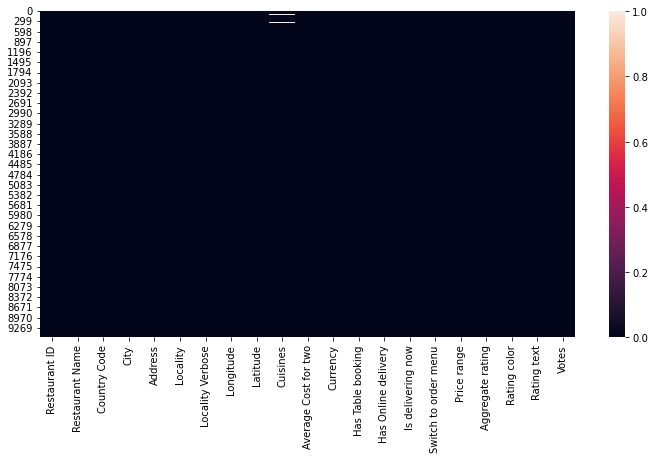

In [127]:
sns.heatmap(data=df.isnull())

In [36]:
features = [features for features in df.columns if df[features].isnull().sum()>0]
features

['Cuisines']

In [38]:
country_df = pd.read_excel(r"C:\Users\use\Downloads\EDA and Feature Engineering\Zomatodataset\Country-Code.xlsx")
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [49]:
df.shape, country_df.shape

((9551, 21), (15, 2))

In [54]:
final_df = pd.merge(df,country_df,how='inner',on='Country Code')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [75]:
country_names = final_df.Country.value_counts().index
country_nmaes

In [64]:
country_values = final_df.Country.value_counts().values
country_values

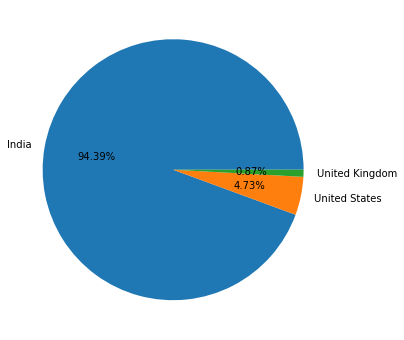

In [126]:
#Pie chat - Top 3 Countries that uses Zomato
plt.pie(x=country_values[:3],labels=country_names[:3],autopct='%1.2f%%')
plt.show()

Observations : Zomato is used mostly in India with almost 94% and 4% in USA then 0.8% in UK.

In [88]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [107]:
rating = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [128]:
rating.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


Obseration
1. When ratings are between 4.5 to 4.9 ---> Excellent
2. When ratings are between 4.0 to 4.4 ---> Very Good
3. When ratings are between 3.5 to 3.9 ---> Good
4. When ratings are between 2.5 to 3.4 ---> Average
5. When ratings are below 2.4 ---> Poor
6. When rating = 0 ---> Not Rated

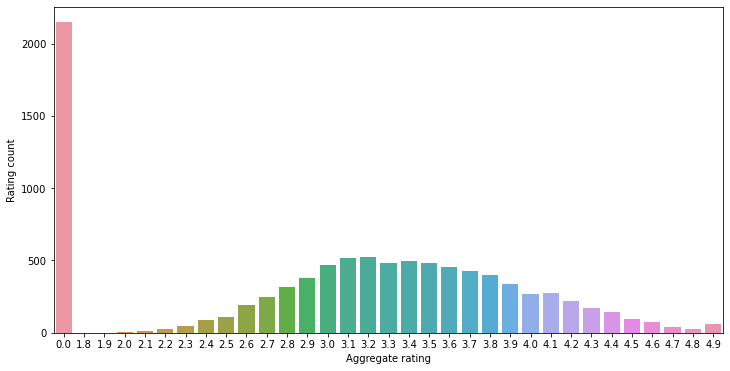

In [131]:
sns.barplot(x='Aggregate rating',y='Rating count', data=rating)
plt.show()

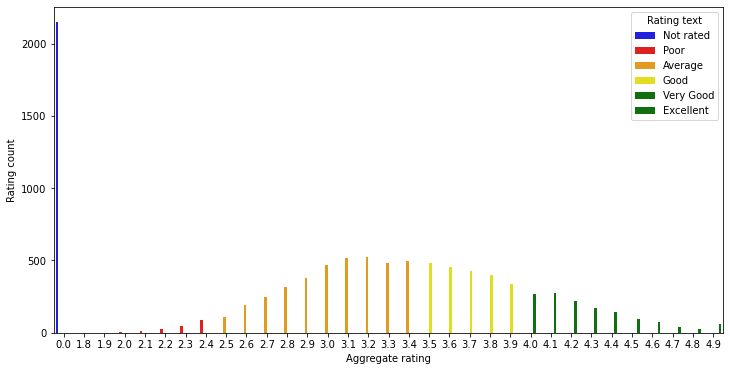

In [136]:
sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating text', data=rating,palette=['blue','red','orange','yellow','green','green'])
plt.show()

Observations

1. Most of the members are not rated.
2. Maximum no. of rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

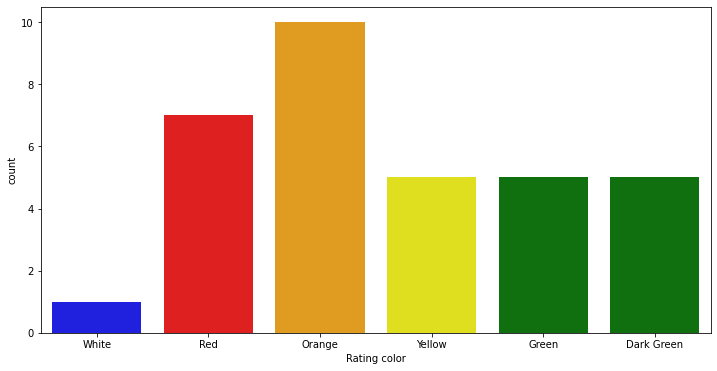

In [139]:
## count plot

sns.countplot(x='Rating color', data=rating, palette=['blue','red','orange','yellow','green','green'])

#### find the country names that has given zero rating

In [150]:
final_df.Country[final_df['Aggregate rating'] == 0.0].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

Observations

1. Maximun number of zero ratings are from India

#### find which currency used by which country

In [154]:
final_df[['Country','Currency']].value_counts()

Country         Currency              
India           Indian Rupees(Rs.)        8652
United States   Dollar($)                  434
United Kingdom  Pounds(£)                  80
Brazil          Brazilian Real(R$)          60
South Africa    Rand(R)                     60
UAE             Emirati Diram(AED)          60
New Zealand     NewZealand($)               40
Turkey          Turkish Lira(TL)            34
Australia       Dollar($)                   24
Phillipines     Botswana Pula(P)            22
Indonesia       Indonesian Rupiah(IDR)      21
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
Sri Lanka       Sri Lankan Rupee(LKR)       20
Canada          Dollar($)                    4
dtype: int64

In [160]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### which country do have online deliveries



In [183]:
final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [184]:
final_df[['Country','Has Online delivery']].value_counts()

Country         Has Online delivery
India           No                     6229
                Yes                    2423
United States   No                      434
United Kingdom  No                       80
South Africa    No                       60
Brazil          No                       60
New Zealand     No                       40
Turkey          No                       34
UAE             No                       32
                Yes                      28
Australia       No                       24
Phillipines     No                       22
Indonesia       No                       21
Sri Lanka       No                       20
Singapore       No                       20
Qatar           No                       20
Canada          No                        4
dtype: int64

Obserations

1. Only India and UAE has Online Delivery Facility in some places.
2. Remaining all countries are not having Online Delivery

In [189]:
## Create a pie chart with City Distribution

city_names = final_df['City'].value_counts().index
city_count = final_df['City'].value_counts().values

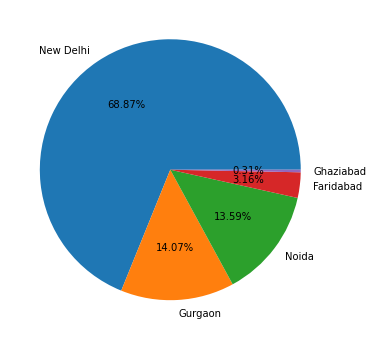

In [195]:
plt.pie(x=city_count[:5],labels=city_names[:5],autopct='%1.2f%%')
plt.show()

Observation:
    
1. Most no of orders are in Delhi next Gurgaon and Noida

### Find the top 10 Cuisines

In [204]:
Cuisines_names = final_df['Cuisines'].value_counts().index
Cuisines_count = final_df['Cuisines'].value_counts().values


array([936, 511, 354, ...,   1,   1,   1], dtype=int64)

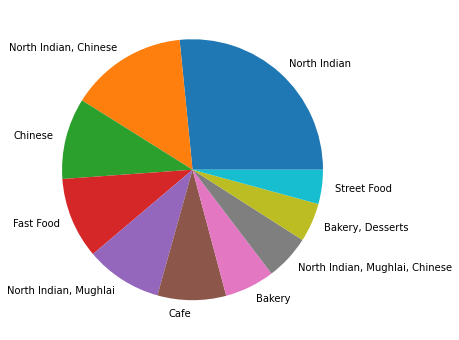

In [207]:
plt.pie(x=Cuisines_count[:10],labels=Cuisines_names[:10])
plt.show()